# AED sur le dataset mall_customer

Dans cette section, nous allons effectuer une analyse exploratoire des données (AED) sur le dataset `mall_customer`. Cette analyse nous permettra de mieux comprendre la structure des données, de détecter les valeurs manquantes, de visualiser les distributions des variables et d'identifier les relations potentielles entre les variables.

In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [200]:
data.shape

(200, 5)

In [201]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [203]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [204]:
# delete CustomerID from data frame
data.drop(["CustomerID"], axis=1,inplace=True)

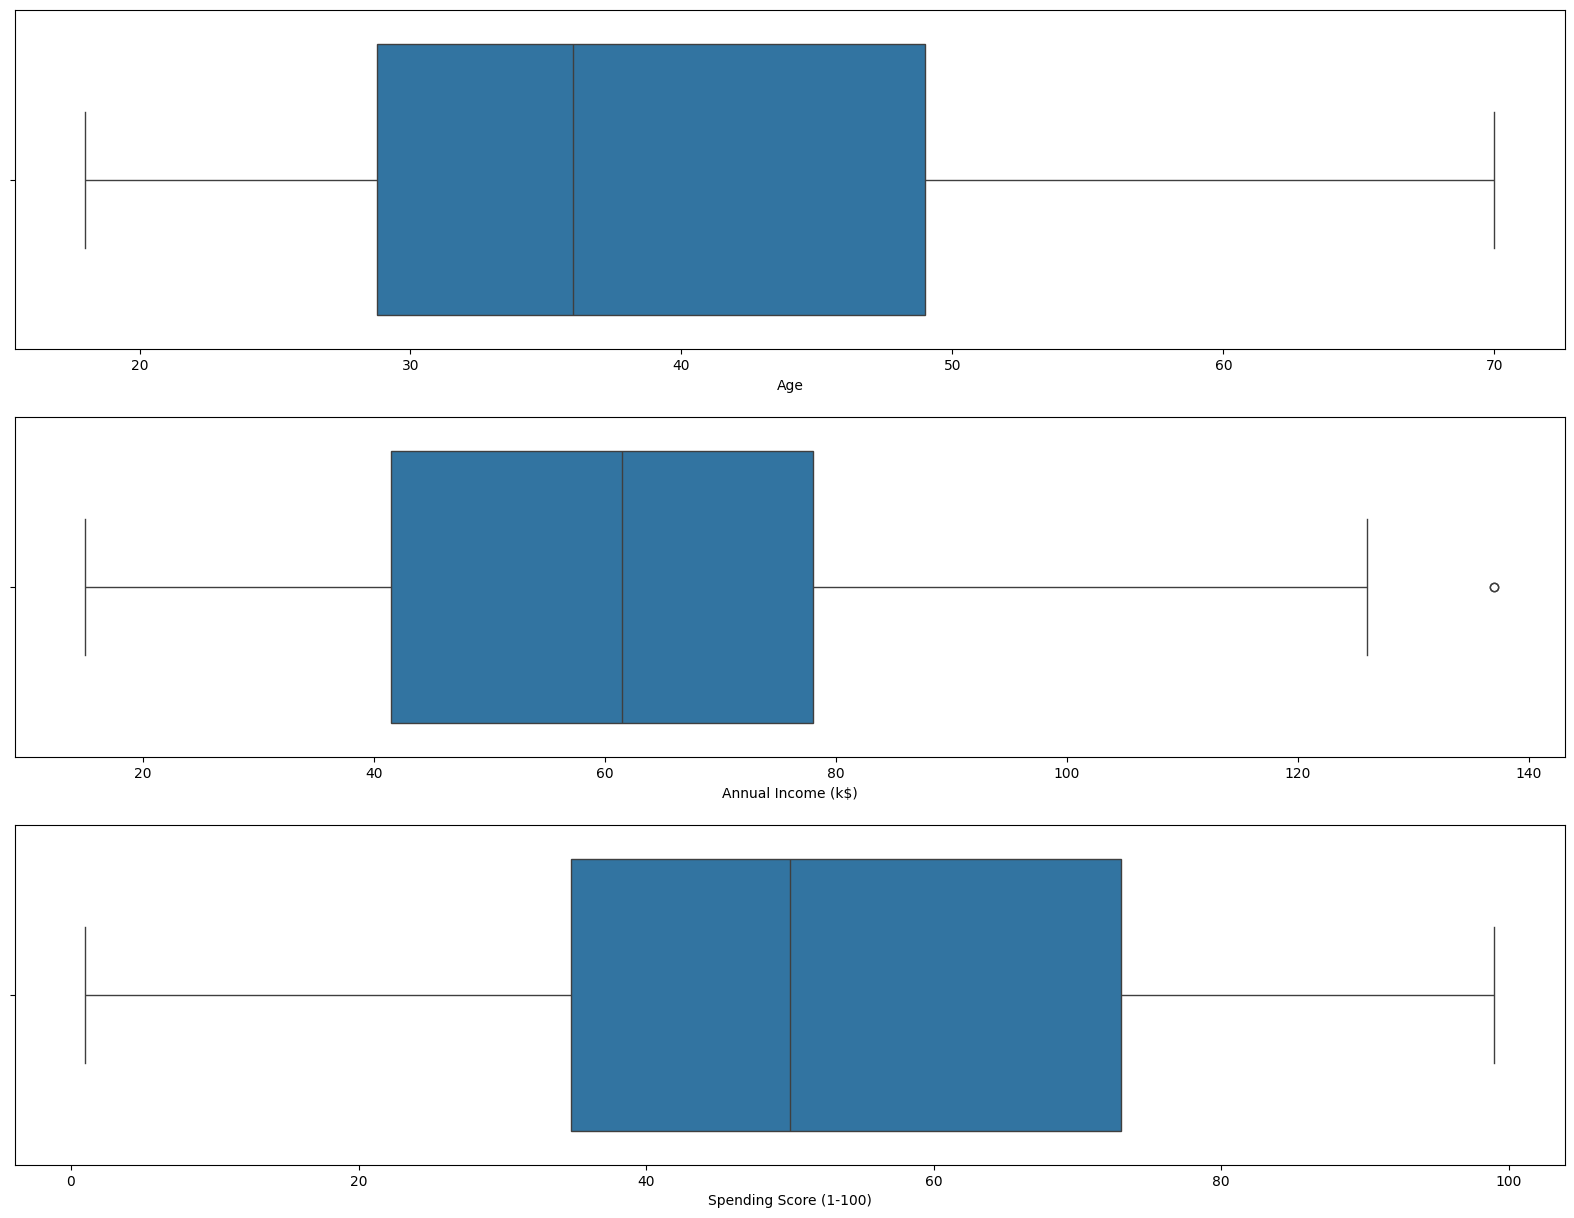

In [205]:
#on vient vérifier avec des boxplot si il y a des outliers (valeurs aberrantes)
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.boxplot(x=data['Age'])
plt.subplot(3,1,2)
sns.boxplot(x=data['Annual Income (k$)'])
plt.subplot(3,1,3)
sns.boxplot(x=data['Spending Score (1-100)'])
plt.show()

*Un outlier est présent concernant les annual incomes. Mais il n'est pas nécessaire de le supprimer car il est possible qu'il s'agisse d'un client très riche.*

/var/folders/k9/dhbh01w55y9gq6g3kxfbr9400000gn/T/ipykernel_51137/4009627306.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot: >

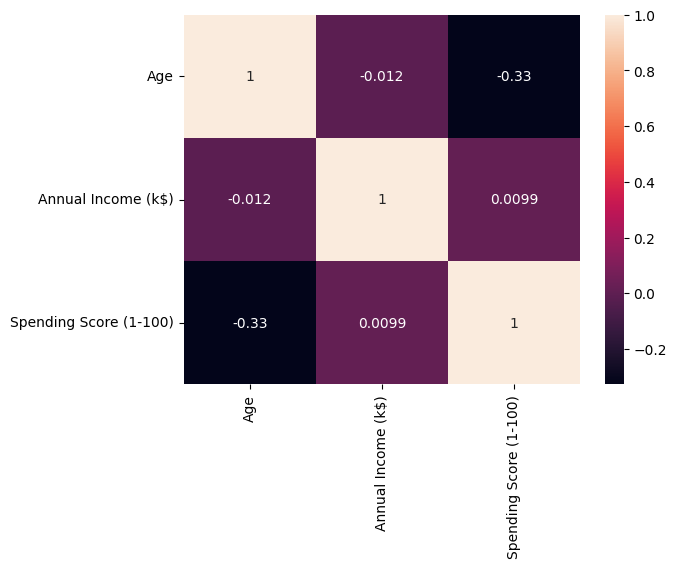

In [206]:
corr = data.corr()
sns.heatmap(corr, annot=True)

Étrangement aucune correlation n'est présente entre les variables. Cela peut être dû à la nature des données qui ont probalement été générées aléatoirement.

In [207]:
# Define age bins
limits = [18, 25, 35, 45, 55, 65, 70]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-70']

data['AgeGroup'] = pd.cut(data['Age'], bins=limits, labels=labels, right=False)

data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeGroup
0,Male,19,15,39,18-25
1,Male,21,15,81,18-25
2,Female,20,16,6,18-25
3,Female,23,16,77,18-25
4,Female,31,17,40,26-35


*Ici on vient créer des groupes d'âges pour pouvoir comparer les habitudes et les comportements des clients en fonction de leur âge.*

/var/folders/k9/dhbh01w55y9gq6g3kxfbr9400000gn/T/ipykernel_51137/2761114436.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['AgeGroup'], palette='viridis', kde=True)


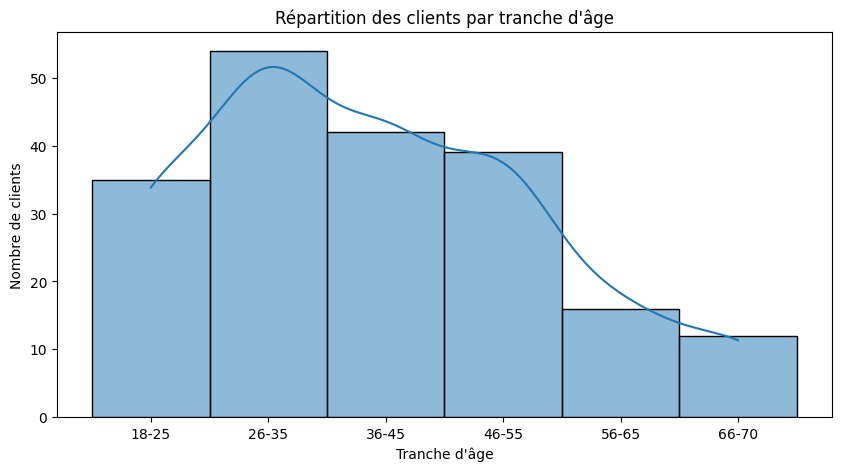

In [208]:
# Répartition des clients par tranche d'âge sur un diagramme en barre avec distribution normale
plt.figure(figsize=(10, 5))
sns.histplot(data['AgeGroup'], palette='viridis', kde=True)
plt.title('Répartition des clients par tranche d\'âge')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Nombre de clients')
plt.show()


/var/folders/k9/dhbh01w55y9gq6g3kxfbr9400000gn/T/ipykernel_51137/2097575203.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=data, palette='viridis')
/var/folders/k9/dhbh01w55y9gq6g3kxfbr9400000gn/T/ipykernel_51137/2097575203.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Annual Income (k$)', data=data, palette='viridis')
/var/folders/k9/dhbh01w55y9gq6g3kxfbr9400000gn/T/ipykernel_51137/2097575203.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Spending Score (1-100)', data=data, pal

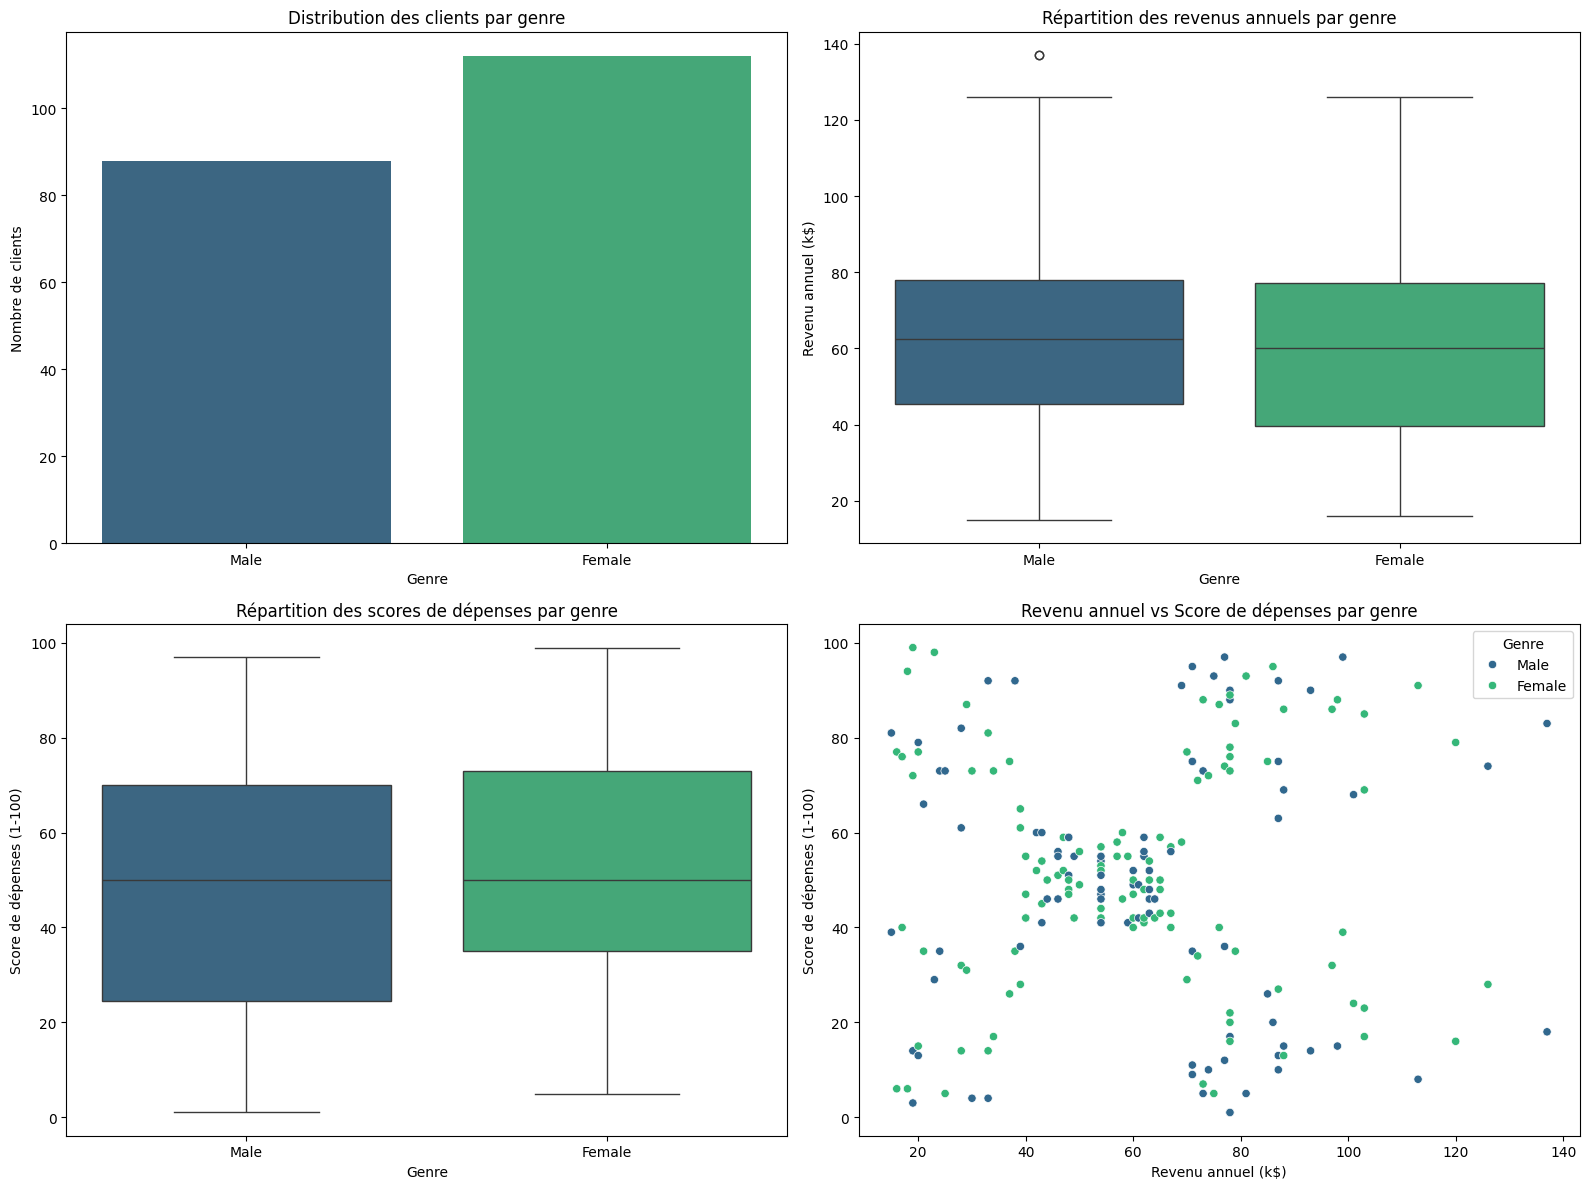

In [209]:
# Create a figure with multiple subplots
plt.figure(figsize=(16, 12))

# Plot 1: Gender distribution
plt.subplot(2, 2, 1)
sns.countplot(x='Genre', data=data, palette='viridis')
plt.title('Distribution des clients par genre')
plt.xlabel('Genre')
plt.ylabel('Nombre de clients')

# Plot 2: Distribution of Annual Income by Gender
plt.subplot(2, 2, 2)
sns.boxplot(x='Genre', y='Annual Income (k$)', data=data, palette='viridis')
plt.title('Répartition des revenus annuels par genre')
plt.xlabel('Genre')
plt.ylabel('Revenu annuel (k$)')

# Plot 3: Distribution of Spending Score by Gender
plt.subplot(2, 2, 3)
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=data, palette='viridis')
plt.title('Répartition des scores de dépenses par genre')
plt.xlabel('Genre')
plt.ylabel('Score de dépenses (1-100)')

# Plot 4: Scatter plot of Annual Income vs Spending Score by Gender
plt.subplot(2, 2, 4)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', data=data, palette='viridis')
plt.title('Revenu annuel vs Score de dépenses par genre')
plt.xlabel('Revenu annuel (k$)')
plt.ylabel('Score de dépenses (1-100)')

plt.tight_layout()
plt.show()

*On remarque qu'il y a plus de femmes que d'hommes dans le dataset. Le revenues des clients est assez bien réparti entre les genres, mais les femmes ont tendance à dépenser légèrement plus que les hommes. Il n'y as pas de liens (corrélation) entre le revenu annuel vs le score de dépenses.*

/var/folders/k9/dhbh01w55y9gq6g3kxfbr9400000gn/T/ipykernel_51137/847865041.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AgeGroup', y='Annual Income (k$)', data=data, palette='viridis')
/var/folders/k9/dhbh01w55y9gq6g3kxfbr9400000gn/T/ipykernel_51137/847865041.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AgeGroup', y='Spending Score (1-100)', data=data, palette='viridis')
/var/folders/k9/dhbh01w55y9gq6g3kxfbr9400000gn/T/ipykernel_51137/847865041.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Annual 

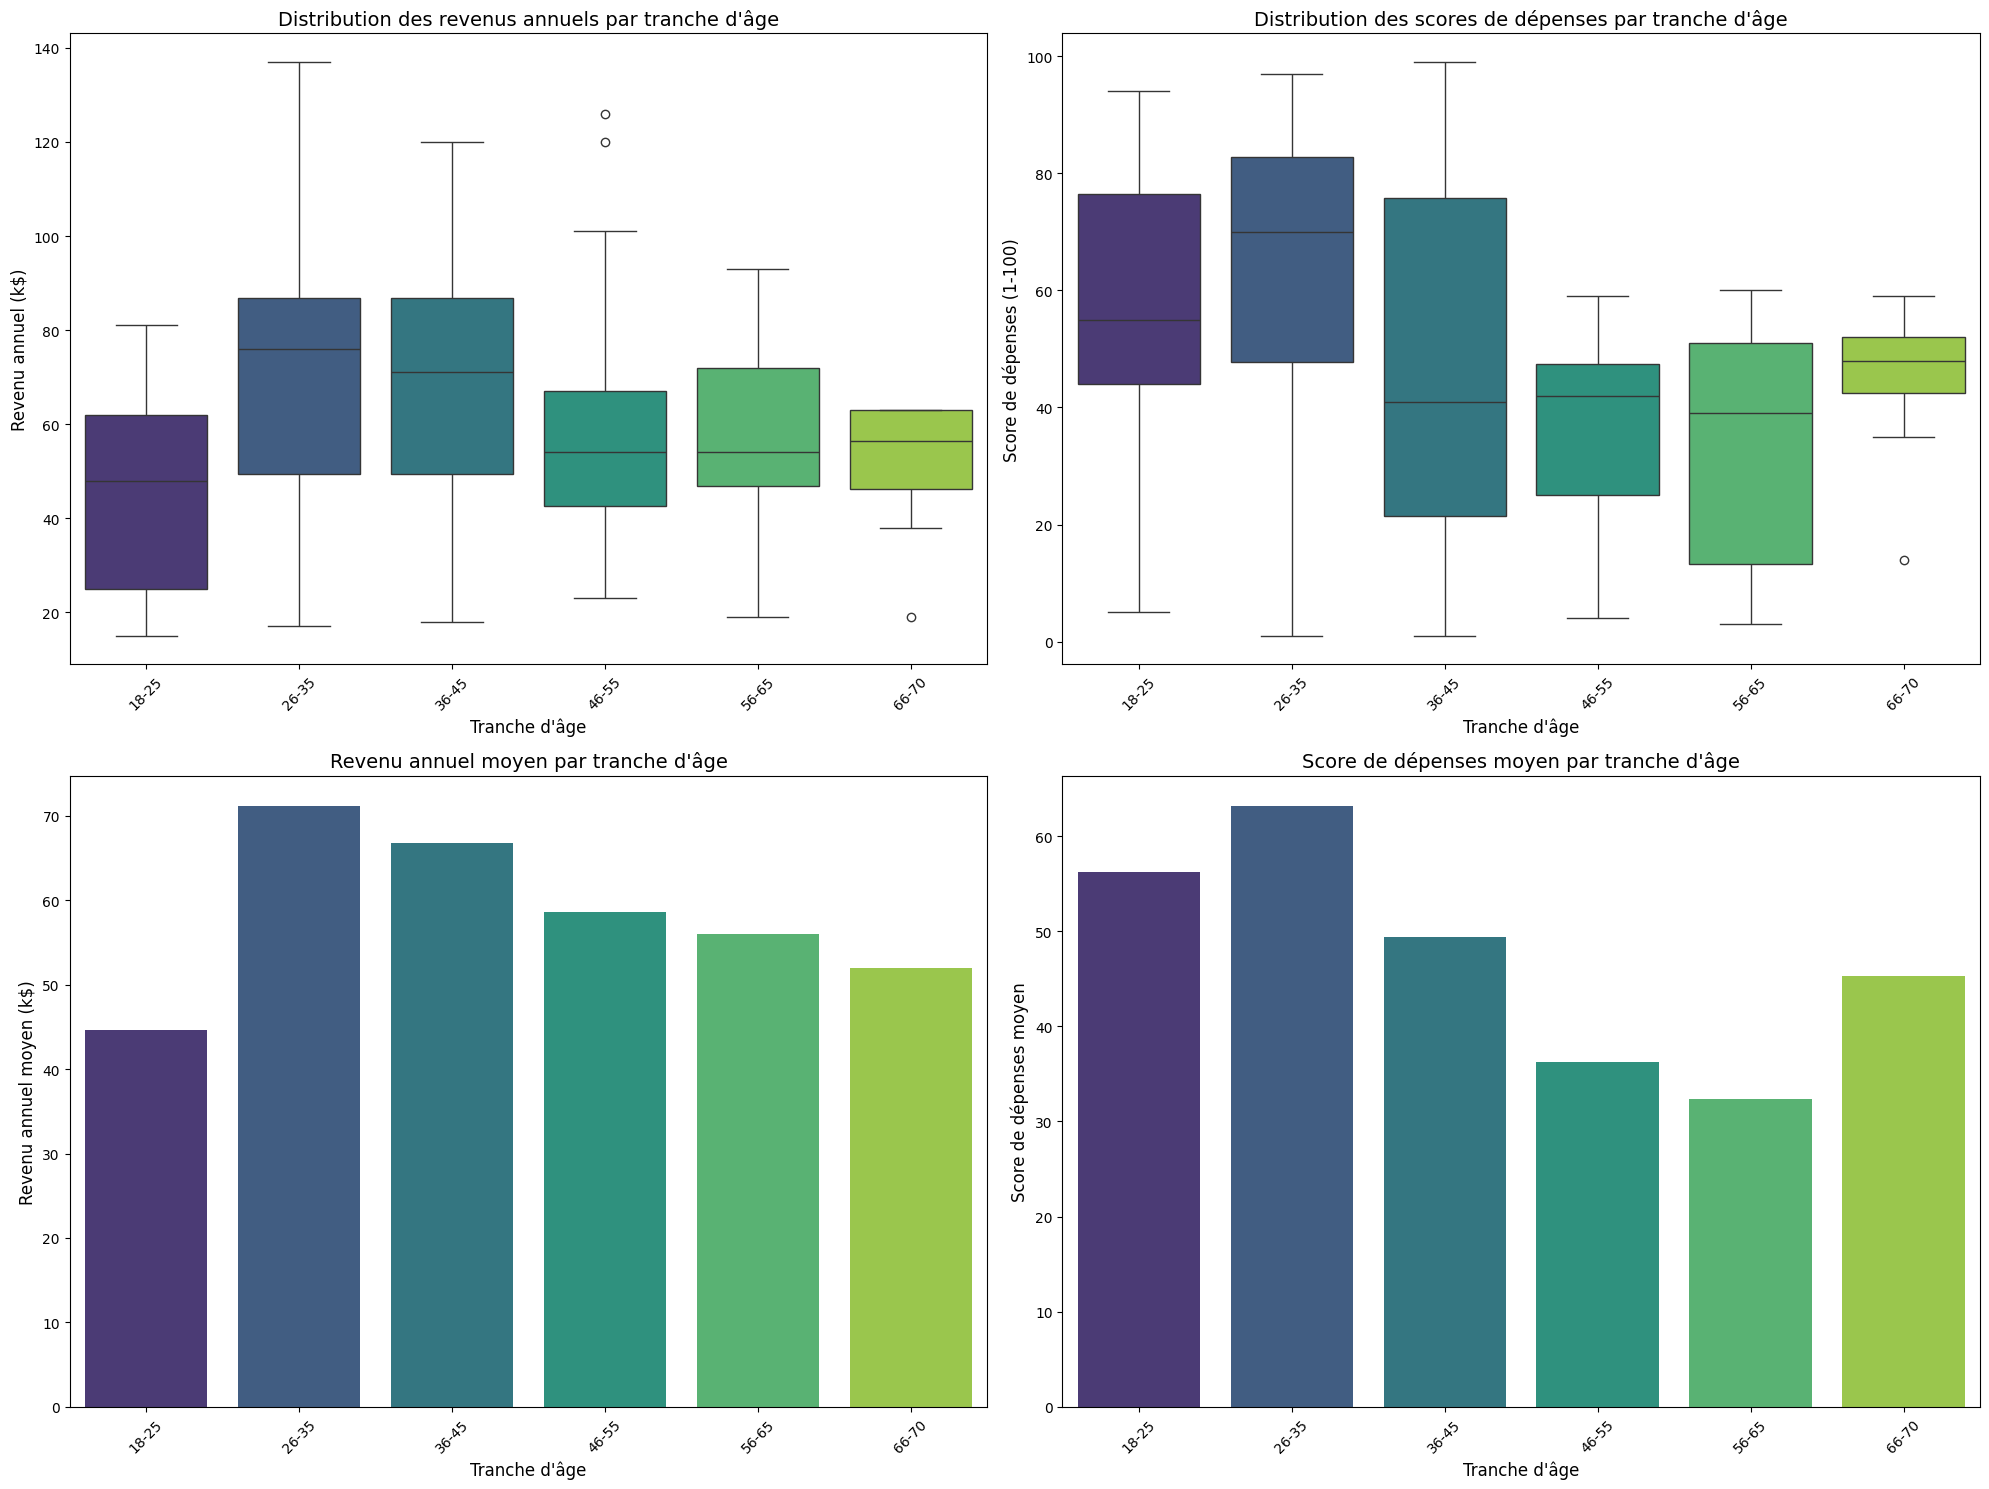

In [210]:
plt.figure(figsize=(20, 15))

# Plot 1: Box plot of Annual Income by Age Group
plt.subplot(2, 2, 1)
sns.boxplot(x='AgeGroup', y='Annual Income (k$)', data=data, palette='viridis')
plt.title('Distribution des revenus annuels par tranche d\'âge', fontsize=14)
plt.xlabel('Tranche d\'âge', fontsize=12)
plt.ylabel('Revenu annuel (k$)', fontsize=12)
plt.xticks(rotation=45)

# Plot 2: Box plot of Spending Score by Age Group
plt.subplot(2, 2, 2)
sns.boxplot(x='AgeGroup', y='Spending Score (1-100)', data=data, palette='viridis')
plt.title('Distribution des scores de dépenses par tranche d\'âge', fontsize=14)
plt.xlabel('Tranche d\'âge', fontsize=12)
plt.ylabel('Score de dépenses (1-100)', fontsize=12)
plt.xticks(rotation=45)

# Plot 3: Bar chart of average Annual Income by Age Group
plt.subplot(2, 2, 3)
age_income = data.groupby('AgeGroup')['Annual Income (k$)'].mean().reset_index()
sns.barplot(x='AgeGroup', y='Annual Income (k$)', data=age_income, palette='viridis')
plt.title('Revenu annuel moyen par tranche d\'âge', fontsize=14)
plt.xlabel('Tranche d\'âge', fontsize=12)
plt.ylabel('Revenu annuel moyen (k$)', fontsize=12)
plt.xticks(rotation=45)

# Plot 4: Bar chart of average Spending Score by Age Group
plt.subplot(2, 2, 4)
age_spending = data.groupby('AgeGroup')['Spending Score (1-100)'].mean().reset_index()
sns.barplot(x='AgeGroup', y='Spending Score (1-100)', data=age_spending, palette='viridis')
plt.title('Score de dépenses moyen par tranche d\'âge', fontsize=14)
plt.xlabel('Tranche d\'âge', fontsize=12)
plt.ylabel('Score de dépenses moyen', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

*La combinaison boxplot/histogram nous permet de voir que la tranche d'âge 26-35 ans est celle qui dépense le plus et qui a le score de dépense le plus élevé. Le dataset ne réprésente pas très bien la réalité, en effet, plus on vielli plus on augmente en salaire. Or ici, les salaires sont assez bien répartis entre les tranches d'âge voir les salaires diminues entre les tranche d'âges.*

In [ ]:
# On va maintenant faire une ANOVA pour comparer le score de dépenses moyen entre plusieurs tranches d’âge
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Extraire les scores de dépenses pour chaque groupe d'âge
group_18_25 = data[data['AgeGroup'] == '18-25']['Spending Score (1-100)']
group_26_35 = data[data['AgeGroup'] == '26-35']['Spending Score (1-100)']
group_36_45 = data[data['AgeGroup'] == '36-45']['Spending Score (1-100)']
group_46_55 = data[data['AgeGroup'] == '46-55']['Spending Score (1-100)']
group_56_65 = data[data['AgeGroup'] == '56-65']['Spending Score (1-100)']
group_66_70 = data[data['AgeGroup'] == '66-70']['Spending Score (1-100)']

f_stat, p_value = f_oneway(
    group_18_25, group_26_35, group_36_45, 
    group_46_55, group_56_65, group_66_70
)

print("Résultats du test ANOVA :")
print(f"F-statistique : {f_stat:.4f}")
print(f"p-value : {p_value:.4f}")

# Interpréter les résultats
alpha = 0.05
if p_value < alpha:
    print(f"La p-value est inférieure à {alpha}, ce qui signifie qu'il y a une différence significative des scores de dépenses entre au moins une paire de groupes d'âge.")
else:
    print(f"La p-value est supérieure à {alpha}, ce qui signifie qu'il n'y a pas de différence significative des scores de dépenses entre les groupes d'âge.")


Résultats du test ANOVA :
F-statistique : 8.2300
p-value : 0.0000
La p-value est inférieure à 0.05, ce qui signifie qu'il y a une différence significative des scores de dépenses entre au moins une paire de groupes d'âge.


In [ ]:
# supression des lignes vides qui sont apparue à la suite de la création de la colonne AgeGroup
data_clean = data.dropna(subset=['AgeGroup'])

if p_value < alpha:
    scores = data_clean['Spending Score (1-100)'].values
    groups = data_clean['AgeGroup'].astype(str).values
    
    # test de Tukey vu sur le cour
    tukey = pairwise_tukeyhsd(scores, groups, alpha=0.05)    
    print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
 18-25  26-35   6.9095 0.7652  -7.9907  21.8098  False
 18-25  36-45  -6.8286  0.811 -22.5437   8.8865  False
 18-25  46-55 -20.0264 0.0052 -36.0138  -4.0389   True
 18-25  56-65 -23.9446 0.0133 -44.6661  -3.2231   True
 18-25  66-70 -11.0071 0.7393 -33.9768  11.9625  False
 26-35  36-45 -13.7381 0.0618 -27.8649   0.3887  False
 26-35  46-55 -26.9359    0.0 -41.3651 -12.5067   True
 26-35  56-65 -30.8542 0.0001 -50.3986 -11.3098   True
 26-35  66-70 -17.9167 0.1782 -39.8303    3.997  False
 36-45  46-55 -13.1978 0.1327  -28.467   2.0714  False
 36-45  56-65 -17.1161 0.1471 -37.2886   3.0564  False
 36-45  66-70  -4.1786 0.9947 -26.6542  18.2971  False
 46-55  56-65  -3.9183 0.9938 -24.3037  16.4671  False
 46-55  66-70   9.0192 0.8616 -13.6477  31.6861  False
 56-65  66-70  12.9375 0.7147 -13.2841  39.1591  False
----------

# Résultats de l'ANOVA
- F-statistique : 8.2300
- p-value : 0.0000 (< 0.05)
- La p-value très faible indique des différences statistiquement significatives dans les scores de dépenses entre les groupes d'âge.

Le test post-hoc (Tukey HSD) a révélé plusieurs différences significatives entre les groupes d'âge :

1. **Le groupe d'âge 18-25 montre des différences significatives avec :**
    - Le groupe d'âge 46-55 (différence : -20.03, p < 0.05)
    - Le groupe d'âge 56-65 (différence : -23.94, p < 0.05)

2. **Le groupe d'âge 26-35 montre des différences significatives avec :**
    - Le groupe d'âge 46-55 (différence : -26.94, p < 0.05)
    - Le groupe d'âge 56-65 (différence : -30.85, p < 0.05)

3. **Comparaisons non significatives :**
    - Pas de différences significatives entre les groupes d'âge adjacents sauf pour 26-35 vs 46-55
    - Le groupe d'âge 66-70 ne montre pas de différences significatives avec les autres groupes
    - Le groupe d'âge 36-45 ne montre pas de différences significatives avec les autres groupes

Ceci montre que les habitudes de dépenses diffèrent entre les jeunes (18-35 ans) et les clients d'âge moyen (46-65 ans), les jeunes ayant généralement des scores de dépenses plus élevés. On retrouve la même conclusion qu'avant avec nos graphiques.

Coefficients du modèle:
Âge: -0.5893
Revenu annuel: 0.0524
Constante: 71.5326

Métriques d'évaluation:
R² score: 0.0196
Mean Absolute Error (MAE): 18.2290
Mean Squared Error (MSE): 483.5568
Root Mean Squared Error (RMSE): 21.9899


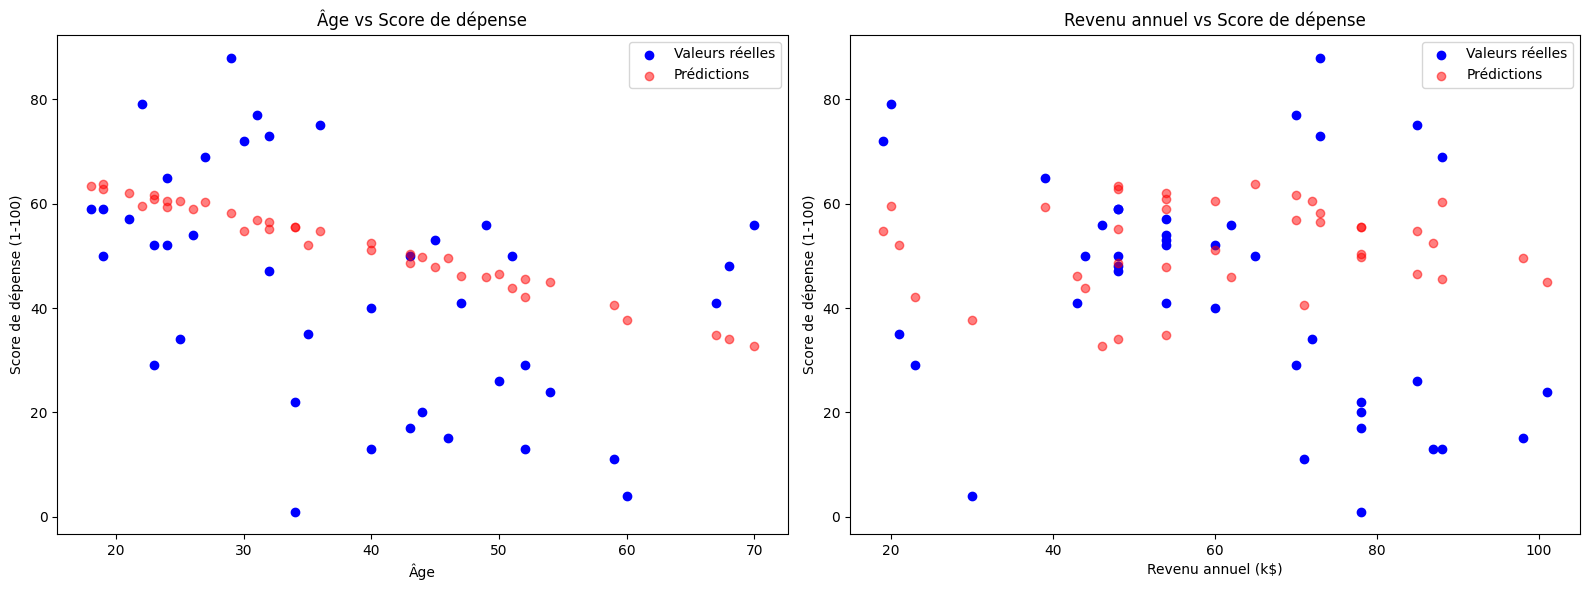

In [ ]:
X = data[['Age', 'Annual Income (k$)']]
y = data['Spending Score (1-100)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Coefficients du modèle:")
print(f"Âge: {model.coef_[0]:.4f}")
print(f"Revenu annuel: {model.coef_[1]:.4f}")
print(f"Constante: {model.intercept_:.4f}")
print("\nMétriques d'évaluation:")
print(f"R² score: {metrics.r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error (MAE): {metrics.mean_absolute_error(y_test, y_pred):.4f}")
print(f"Mean Squared Error (MSE): {metrics.mean_squared_error(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.4f}")

plt.figure(figsize=(16, 6))

# Graphique pour l'âge vs score de dépense
plt.subplot(1, 2, 1)
plt.scatter(X_test['Age'], y_test, color='blue', label='Valeurs réelles')
plt.scatter(X_test['Age'], y_pred, color='red', alpha=0.5, label='Prédictions')
plt.title('Âge vs Score de dépense')
plt.xlabel('Âge')
plt.ylabel('Score de dépense (1-100)')
plt.legend()

# Graphique pour le revenu vs score de dépense  
plt.subplot(1, 2, 2)
plt.scatter(X_test['Annual Income (k$)'], y_test, color='blue', label='Valeurs réelles')
plt.scatter(X_test['Annual Income (k$)'], y_pred, color='red', alpha=0.5, label='Prédictions')
plt.title('Revenu annuel vs Score de dépense')
plt.xlabel('Revenu annuel (k$)')
plt.ylabel('Score de dépense (1-100)')
plt.legend()

plt.tight_layout()
plt.show()

*Comme nous l'avons vu, il n'y a pas de corrélation entre les variables, et les prédictions sont mauvaises. Cela peut être dû à la nature des données qui ont probablement été générées aléatoirement.*

# Conclusion générale de l'analyse du dataset Mall Customer

Cette analyse exploratoire du dataset Mall Customer nous a permis de dégager plusieurs observations et conclusions importantes :

## Structure des données
- Le dataset contient 200 observations avec des informations sur l'âge, le genre, le revenu annuel et le score de dépense des clients d'un centre commercial
- Aucune valeur manquante n'est présente dans le dataset
- Un regroupement par tranches d'âge a été effectué pour faciliter l'analyse

## Principaux constats
- **Absence de corrélation** : Contrairement à ce qu'on pourrait attendre dans des données commerciales réelles, il n'existe quasiment aucune corrélation entre les variables (âge, revenu, score de dépenses), on peut alors penser que les données pourraient être générées artificiellement
- **Distribution par genre** : Le dataset contient plus de femmes que d'hommes, avec une légère tendance des femmes à avoir des scores de dépenses plus élevés
- **Influence de l'âge** : 
    - Les tranches d'âge 18-25 ans et 26-35 ans présentent les scores de dépenses significativement plus élevés
    - Les clients de 46-55 ans et 56-65 ans ont les scores de dépenses les plus faibles
    - Cette différence est statistiquement significative selon l'ANOVA (p-value < 0.05)

## Tentative de modélisation
- La régression linéaire utilisant l'âge et le revenu comme prédicteurs du score de dépense a donné des résultats mauvais
- Le faible R² confirme l'absence de relation linéaire exploitable entre ces variables
- Les visualisations des prédictions montrent clairement l'inadéquation du modèle linéaire pour ces données

## Limites de l'analyse
- La nature probablement artificielle des données limite la portée des conclusions
- L'absence de corrélation entre revenu et dépenses ne correspond pas aux phénomènes économiques habituellement observés
- Le dataset ne semble pas bien représenter la réalité économique (notamment concernant la relation âge-revenu)

En conclusion le dataset n'est pas pertinent pour une analyse commerciale sérieuse, mais il reste utile pour s'entraîner aux techniques d'analyse de données.